# **Decision Tree Classification**

In [25]:
import warnings

# Suppress only specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
inputs = df.drop('salary_more_then_100k', axis = 'columns')
target = df['salary_more_then_100k']

In [6]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [26]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [9]:
inputs['comapny_lable'] = le_company.fit_transform(inputs['company'])
inputs['job_lable'] = le_company.fit_transform(inputs['job'])
inputs['degree_lable'] = le_company.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,comapny_lable,job_lable,degree_lable
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [10]:
inputs.drop(['company','job','degree'], axis = 'columns', inplace = True)
inputs.head()

,comapny_lable,job_lable,degree_lable
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [11]:
target.head()

,salary_more_then_100k
0,0
1,0
2,1
3,1
4,0


In [28]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [30]:
model.fit(inputs, target)

DecisionTreeClassifier()

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

In [32]:
model.predict([[2,0,1]])

array([1])

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

In [34]:
model.predict([[2,1,1]])

array([1])

## **Exercise: Build decision tree model to predict survival based on certain parameters**

CSV file is available to download at https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv

In this file using following columns build a model to predict if person would survive or not,
1. Pclass
2. Sex
3. Age
4. Fare

Calculate score of your model

In [97]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

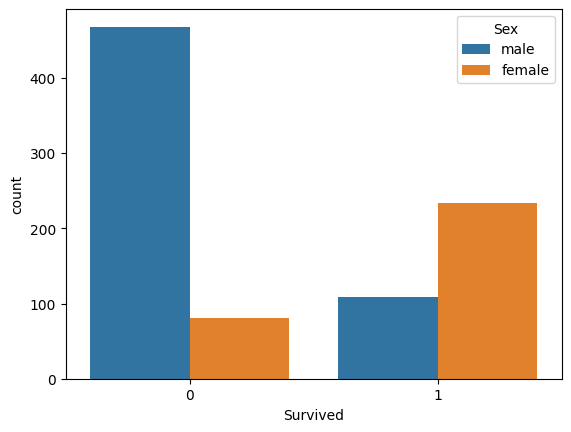

In [98]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df)

In [100]:
# x = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Survived'], axis = 'columns')

x = df[['Pclass','Sex','Age','Fare']]
x.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [101]:
x.isnull().sum()

,0
Pclass,0
Sex,0
Age,177
Fare,0


In [102]:
x['Age'].fillna(x['Age'].mean(), inplace = True)

<ipython-input-102-9ba50337534b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age'].fillna(x['Age'].mean(), inplace = True)


In [103]:
x.Sex = x.Sex.map({'male': 1, 'female': 2})
x.head()

<ipython-input-103-4f9d8e502987>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Sex = x.Sex.map({'male': 1, 'female': 2})


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [104]:
y = df.Survived
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [113]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [119]:
len(x_train)

712

In [120]:
x_train.head()

,Pclass,Sex,Age,Fare
73,3,1,26.0,14.4542
7,3,1,2.0,21.0750
558,1,2,39.0,79.6500
542,3,2,11.0,31.2750
319,1,2,40.0,134.5000


In [121]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [122]:
model.score(x_test, y_test)

0.7486033519553073

In [118]:
model.predict([[1,1,30,7.2500]])

array([0])

In [123]:
model.predict([[3,2,22,7.2500]])

array([1])